In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import keras
import math
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline

In [2]:
df = pd.read_csv('train13519.csv')
df.head()

timestamp  hourly_traffic_count
0  2015-10-04 00:00:00                     3
1  2015-10-04 00:05:00                    12
2  2015-10-04 00:10:00                     4
3  2015-10-04 00:15:00                     9
4  2015-10-04 00:20:00                     5

In [3]:
df.shape

(26496, 2)

In [4]:
df1 = df.head(10000)

In [5]:
df = df.reset_index()['hourly_traffic_count']
df.head()

0     3
1    12
2     4
3     9
4     5
Name: hourly_traffic_count, dtype: int64

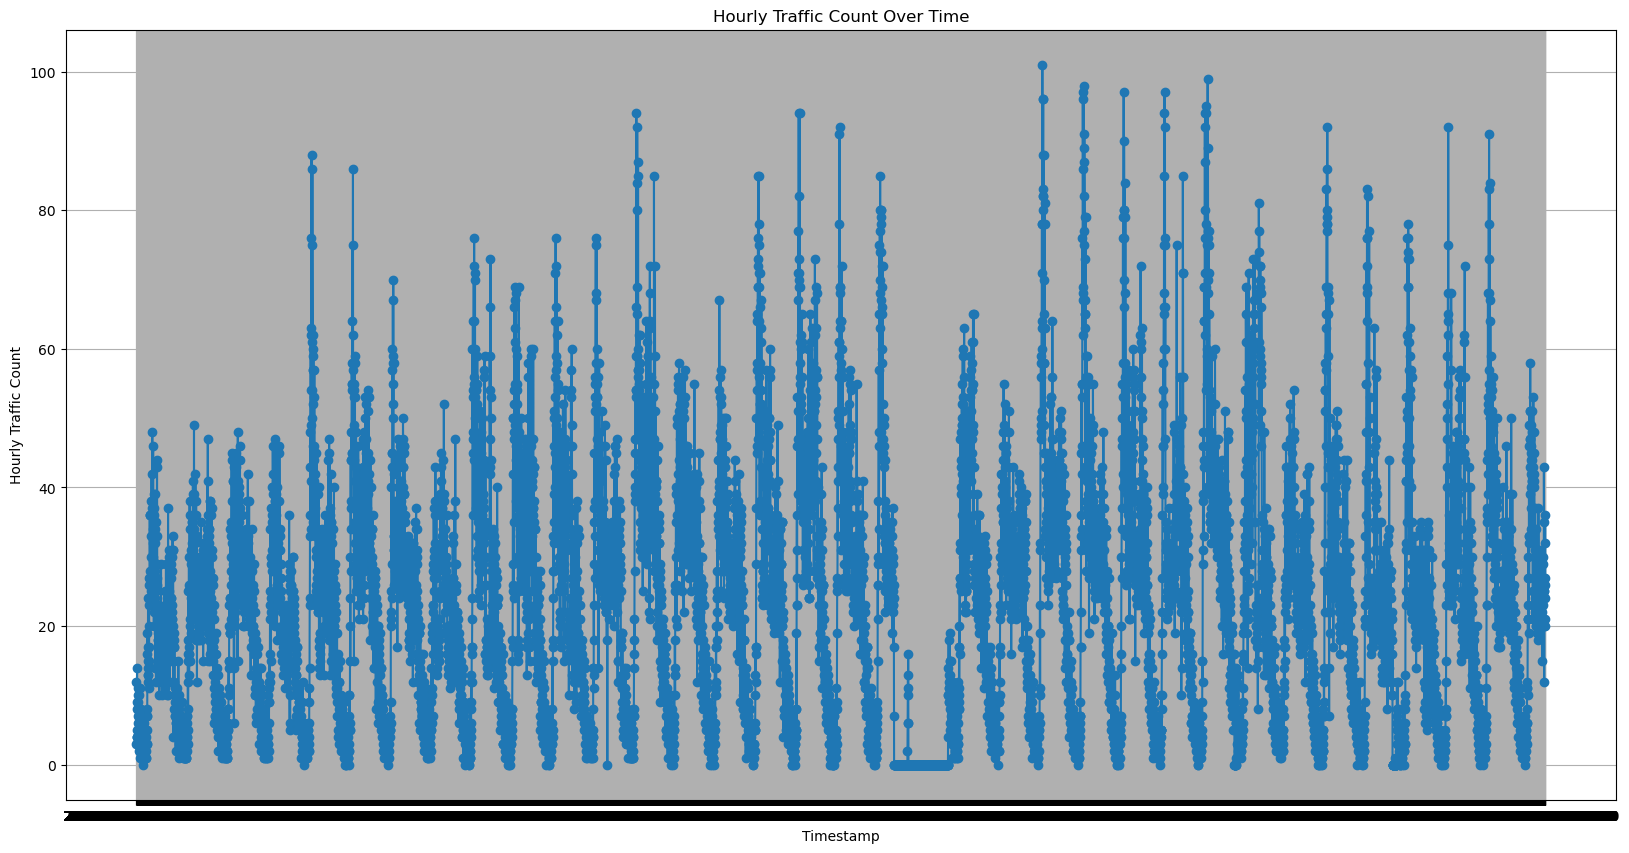

In [6]:
plt.figure(figsize=(20, 10))
plt.plot(df1['timestamp'], df1['hourly_traffic_count'], marker='o', linestyle='-')

plt.title('Hourly Traffic Count Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Hourly Traffic Count')

plt.grid(True)
plt.show()

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(np.array(df).reshape(-1, 1))


In [8]:
def create_dataset(dataset, window=1):
    dataX, dataY= [], []
    for i in range(len(dataset)-window-1):
        a = dataset[i:(i+window),0]
        dataX.append(a)
        dataY.append(dataset[i+window,0])
    return np.array(dataX), np.array(dataY)

In [9]:
training_size = int(len(df1)*0.80)
test_size = len(df)-training_size
train_data, test_data = df[0:training_size,:], df[training_size:len(df1),:1]

In [10]:
window = 100
X_train,y_train = create_dataset(train_data,window)
X_test, y_test = create_dataset(test_data,window)

In [11]:
model = Sequential()
model.add(Dense(40, input_dim=window, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))

In [12]:
opt  = keras.optimizers.Adagrad(learning_rate = 0.05)
model.compile(optimizer=opt ,loss='mean_squared_error')

In [13]:
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

Epoch 1/100

790/790 [==============================] - 1s 933us/step - loss: 0.0050
Epoch 2/100
790/790 [==============================] - 1s 907us/step - loss: 0.0037
Epoch 3/100
790/790 [==============================] - 1s 889us/step - loss: 0.0035
Epoch 4/100
790/790 [==============================] - 1s 891us/step - loss: 0.0034
Epoch 5/100
790/790 [==============================] - 1s 892us/step - loss: 0.0033
Epoch 6/100
790/790 [==============================] - 1s 887us/step - loss: 0.0033
Epoch 7/100
790/790 [==============================] - 1s 901us/step - loss: 0.0032
Epoch 8/100
790/790 [==============================] - 1s 886us/step - loss: 0.0031
Epoch 9/100
790/790 [==============================] - 1s 913us/step - loss: 0.0031
Epoch 10/100
790/790 [==============================] - 1s 898us/step - loss: 0.0031
Epoch 11/100
790/790 [==============================] - 1s 888us/step - loss: 0.0031
Epoch 12/100
790/790 [==============================] - 1s 893us/step - l

60/60 [==============================] - 0s 1ms/step
Mean Squared Error on Test Set: 56.707212725194346


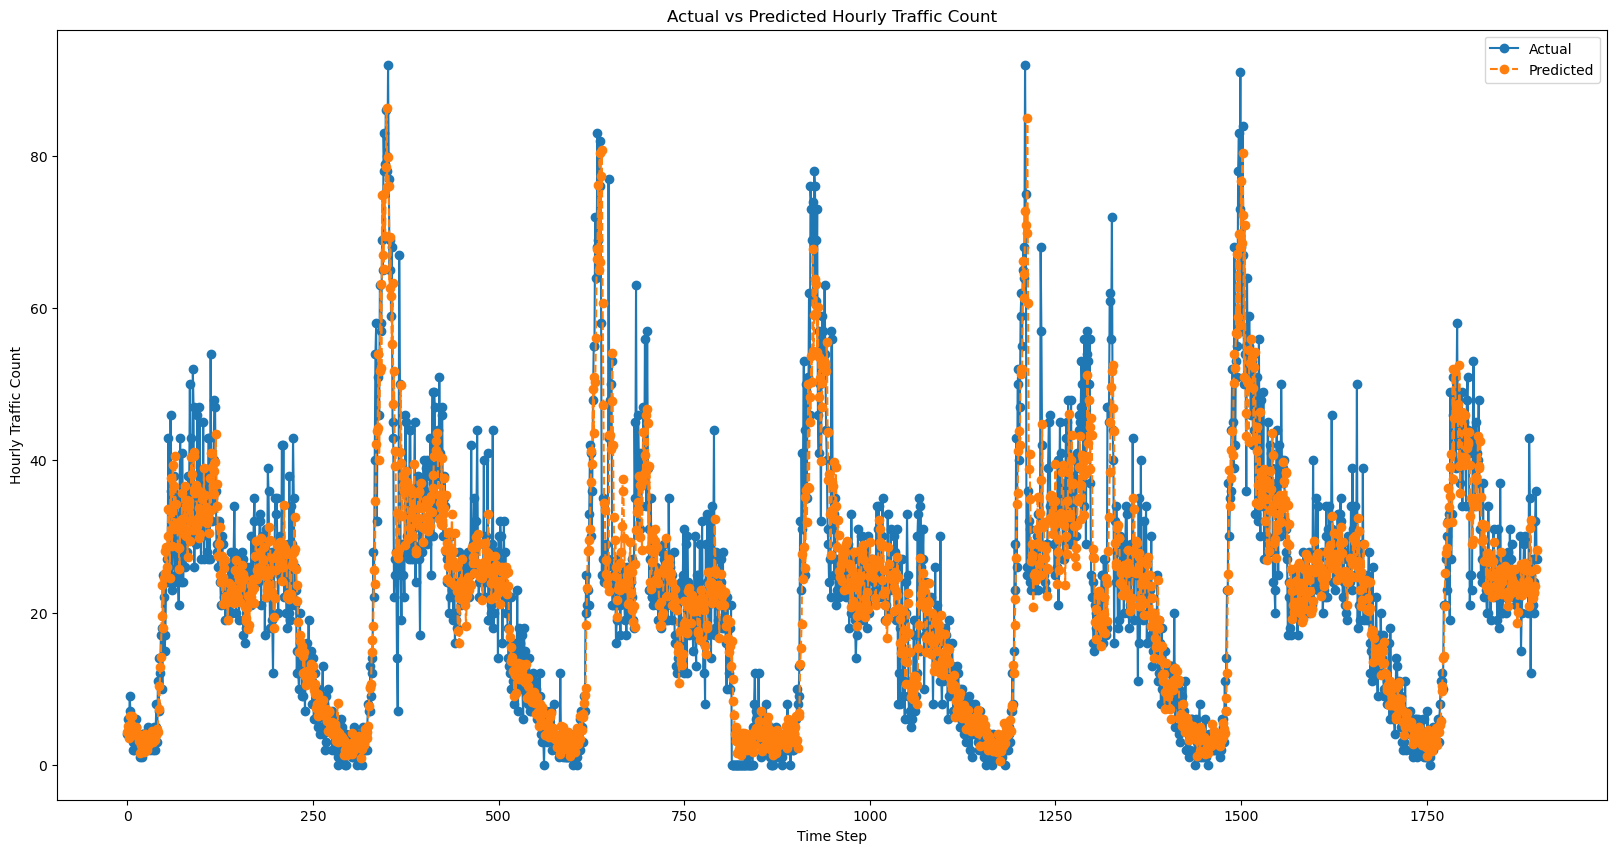

In [14]:
y_pred = model.predict(X_test)
y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
# Evaluate the model performance ( mean squared error)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
print(f"Mean Squared Error on Test Set: {mse}")
# Plot the actual vs predicted values
plt.figure(figsize=(20, 10))
plt.plot(y_test_inverse, label='Actual', marker='o', linestyle='-')
plt.plot(y_pred_inverse, label='Predicted', marker='o', linestyle='--')
plt.title('Actual vs Predicted Hourly Traffic Count')
plt.xlabel('Time Step')
plt.ylabel('Hourly Traffic Count')
plt.legend()
plt.show()